In [6]:
import yfinance as yf
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from scipy.optimize import Bounds 

In [18]:
stocks = ['AA','AAA','STBX','TSLA','AAPL','LHX','LMT','INTC',]
portfolio = yf.download(stocks, start= '2015-01-01')['Adj Close']
retdf = portfolio.pct_change()
retdf = retdf.dropna()

[*********************100%%**********************]  8 of 8 completed


In [12]:
W = []

def get_ER():
        r = W.dot(retdf.mean())
        return r

def get_std():
    std = (W.dot(retdf.cov().dot(W))**(1/2))
    return std

def get_sharpe():
    sharpe = get_ER()/get_std()
    return sharpe

def p_covar():
     return retdf.cov()

In [11]:
def mrm (weights, df):
    e = weights.dot(df.mean())
    std = weights.dot(df.cov().dot(weights))**0.5
    sharpe = e / std
    return e, std, sharpe

def give_weights(df):
    rand = np.random.random(len(df.columns)) #create a vector of length n of random numbers 
    rand /= rand.sum() #divding all the these numbers by the sum will ensure all the weights sum to 1.
    return rand



In [ ]:
SReturns = []
SRisk = []
SSharpe = []
SWeights = []

for i in range(0,5000):
    weights = give_weights(retdf)
    a,b,c = mrm(weights,retdf)
    SReturns.append(a)
    SRisk.append(b)
    SSharpe.append(c)
    SWeights.append(weights)

In [ ]:
compare = pd.DataFrame({'Returns':Returns,'Risk': Risk ,'Sharpe': Sharpe, 'Weights': Weights})
compare.nlargest(1,'Sharpe')

In [ ]:
compare.plot(x= 'Returns', y='Risk', kind='scatter')

In [ ]:
cons = ({'type':'eq','fun': lambda x : np.sum(x)-1})

In [ ]:
optimal_weights = minimize(p_sharpe,w, ret_df,constraints= cons)['x']
optimal_weights

### Montecarlo Method

In [9]:
def get_weights(n):
    # Generate n random values that sum to 1 using Dirichlet distribution
    random_values = np.random.dirichlet(np.ones(n), size=1)
    return random_values[0]

In [27]:
Returns = []
Risk = []
Sharpe = []
Weights = []

for i in range(0,10000):
    weights = get_weights(len(retdf.columns))
    a,b,c = mrm(weights,retdf)
    Returns.append(a)
    Risk.append(b)
    Sharpe.append(c)
    Weights.append(weights)

<Axes: xlabel='Risk', ylabel='Expected Return.'>

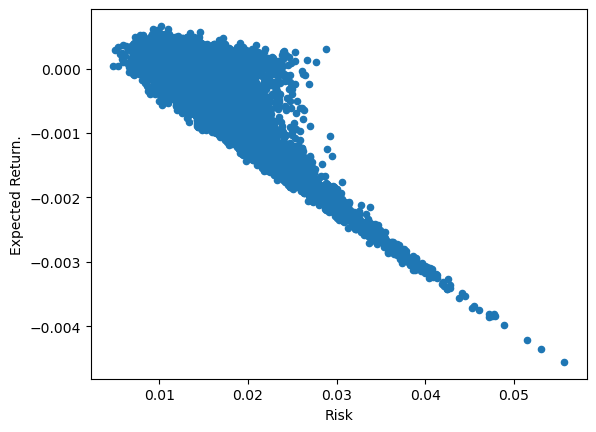

In [28]:
Stat = pd.DataFrame({'Expected Return.':Returns,
                'Risk':Risk,
                'Sharpe': Sharpe,
                'weights':Weights})

Stat.plot(x='Risk',y='Expected Return.',kind='scatter')

In [29]:
Stat

,Expected Return.,Risk,Sharpe,weights
0,-0.000696,0.015148,-0.045957,"[0.08759624499846289, 0.282652117900616, 0.141..."
1,0.000190,0.014675,0.012952,"[0.32675836682915865, 0.30596410953185926, 0.1..."
2,-0.000010,0.011780,-0.000817,"[0.15097443504340363, 0.20618859353136426, 0.0..."
3,0.000094,0.018882,0.004978,"[0.4404097126018024, 0.18553336034262274, 0.10..."
4,-0.000323,0.016546,-0.019516,"[0.033019329783802696, 0.06046874059042304, 0...."
...,...,...,...,...
9995,0.000041,0.022444,0.001847,"[0.5555200338958005, 0.0029710979718998473, 0...."
9996,-0.000275,0.022966,-0.011971,"[0.5630529283670634, 0.08381040947499352, 0.15..."
9997,-0.000580,0.012469,-0.046501,"[0.04684639781321328, 0.3865998247225873, 0.20..."
9998,0.000042,0.016817,0.002473,"[0.24526494563248782, 0.0496689174494272, 0.34..."


8